In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



A fully synthetic but realistic dataset created for Machine Learning practice, focusing on how lifestyle, health habits, and medical indicators influence the risk of diabetes.

This dataset simulates 5000 individuals with various health and lifestyle attributes.

Each record represents one person and includes both **clinical metrics** (Glucose, BMI, Insulin) and **behavioral factors** (Diet, Exercise, Smoking, etc.).

The target variable is Diabetes_Status (0 = No Diabetes, 1 = Diabetes).

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Glucose,BMI,Insulin,Age,Gender,Diet_Type,Exercise_Frequency,Heredity,Smoking,Alcohol,Stress_Score,Sleep_Hours,Diabetes_Status
0,101.3,30.9,83.6,51.0,Male,Healthy,3-5 times/week,No,No,NaN,7.5,6.5,1.0
1,121.8,28.0,78.7,52.0,Female,Unhealthy,Daily,No,No,Moderate,6.9,6.6,1.0
2,121.2,27.2,79.3,51.0,NaN,Healthy,3-5 times/week,No,No,Low,5.4,6.8,1.0
3,121.9,22.8,93.1,46.0,Male,Moderate,Daily,No,No,NaN,4.0,6.3,0.0
4,156.3,NaN,77.3,42.0,Male,Unhealthy,1-2 times/week,No,No,NaN,6.5,5.6,1.0


# Data Exploration

In [3]:
df.describe()

,Glucose,BMI,Insulin,Age,Stress_Score,Sleep_Hours,Diabetes_Status
count,4751.000000,4791.000000,4744.000000,4759.000000,4748.000000,4758.000000,4760.000000
mean,122.097558,26.621791,80.810835,44.285984,5.949284,6.481084,0.924580
std,32.301067,5.478449,18.897666,11.905504,1.954350,1.222833,0.264096
min,60.000000,14.000000,17.400000,18.000000,1.000000,3.000000,0.000000
25%,99.400000,22.900000,67.300000,36.000000,4.600000,5.600000,1.000000
50%,120.700000,26.500000,80.300000,44.000000,5.950000,6.500000,1.000000
75%,143.750000,30.300000,93.325000,52.000000,7.400000,7.300000,1.000000
max,238.000000,47.500000,153.700000,80.000000,10.000000,10.000000,1.000000


In [4]:
df.dtypes

Glucose               float64
BMI                   float64
Insulin               float64
Age                   float64
Gender                 object
Diet_Type              object
Exercise_Frequency     object
Heredity               object
Smoking                object
Alcohol                object
Stress_Score          float64
Sleep_Hours           float64
Diabetes_Status       float64
dtype: object

In [5]:
df.shape

(5000, 13)

In [6]:
df["Diabetes_Status"].value_counts().rename({1: "Diabetes", 0: "No Diabetes"})

Diabetes_Status
Diabetes       4401
No Diabetes     359
Name: count, dtype: int64

In [7]:
df.isna().sum()

Glucose                249
BMI                    209
Insulin                256
Age                    241
Gender                 246
Diet_Type              230
Exercise_Frequency     230
Heredity               257
Smoking                252
Alcohol               2618
Stress_Score           252
Sleep_Hours            242
Diabetes_Status        240
dtype: int64

**What do we do with Null values? Are we going to fill them in or remove them?**
- Removing each row with a null value would eliminate too many data points
- For the **numeric values** (Glucose, BMI, Insulin, Age, Stress_score, Sleep_hours) we can fill in *null* values with the avg for that column. 
- For the **categorical values** (Gender, Diet_Type, Exercise_Frequency, Hereditary, Smoking, Alchohol) we can fill in the *null* values with the most common value in that column. 

This is a band-aid fix, however I believe this is better than removing the entire row if there is 1 column with a missing value

In [8]:
# Fill in NA Numeric Values (Glucose, BMI, Insulin, Age, Stress_score, Sleep_hours)
numeric = df.select_dtypes(include=['float64', 'int64'])
# have to remove 'Diabetes_Status' because thats the target column. 
numeric.drop(columns = 'Diabetes_Status', inplace=True)
# numeric
# Replaces all null values with the mean of the column
for col in numeric: 
   df[col].fillna(df[col].mean(), inplace=True)


In [9]:
# Fill in all NA categorical Values (Gender, Diet_Type, Exercise_Frequency, Hereditary, Smoking, Alchohol)
categorical = df.select_dtypes(include=['object'])
categorical

# mode() returns a series, but fillna() needs a scalar value. mode()[0] returns the first value, in case there are multiple
for col in categorical: 
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
# no more null values!! 
df.isna().sum()

Glucose                 0
BMI                     0
Insulin                 0
Age                     0
Gender                  0
Diet_Type               0
Exercise_Frequency      0
Heredity                0
Smoking                 0
Alcohol                 0
Stress_Score            0
Sleep_Hours             0
Diabetes_Status       240
dtype: int64

In [11]:
# remove the rows with null values in the target (Diabetes_Status) column
df.dropna(subset='Diabetes_Status', inplace=True)
df
df['Diabetes_Status'] = df['Diabetes_Status'].astype(int)

# Visualizations

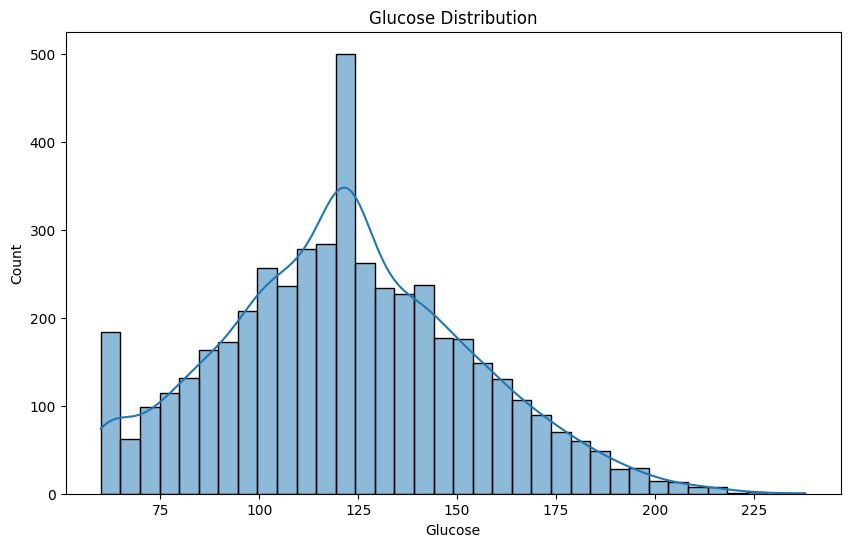

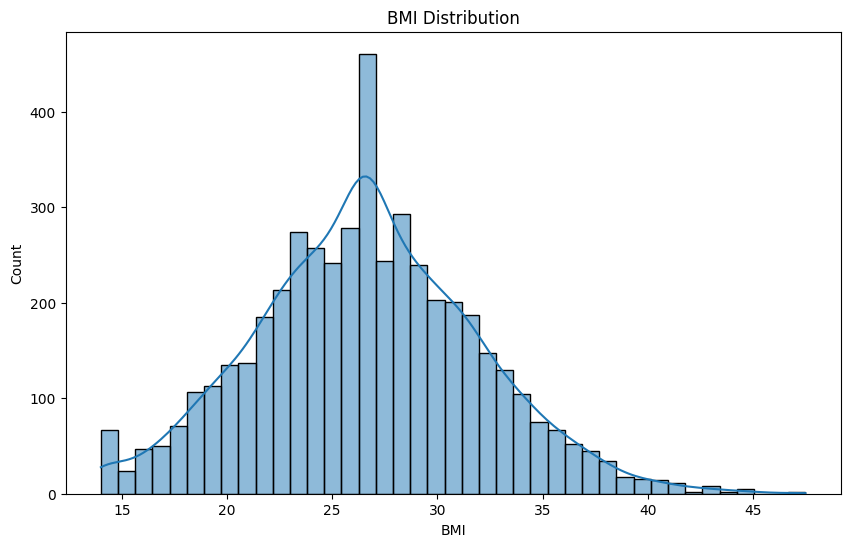

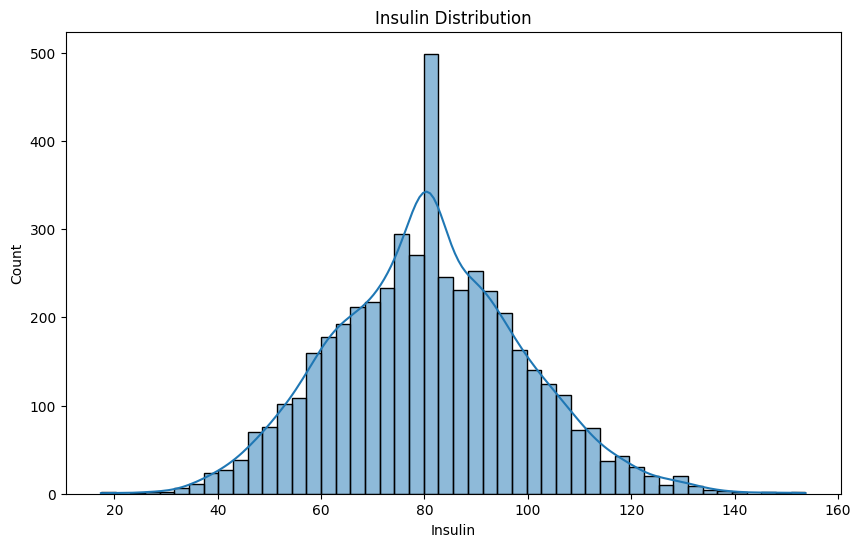

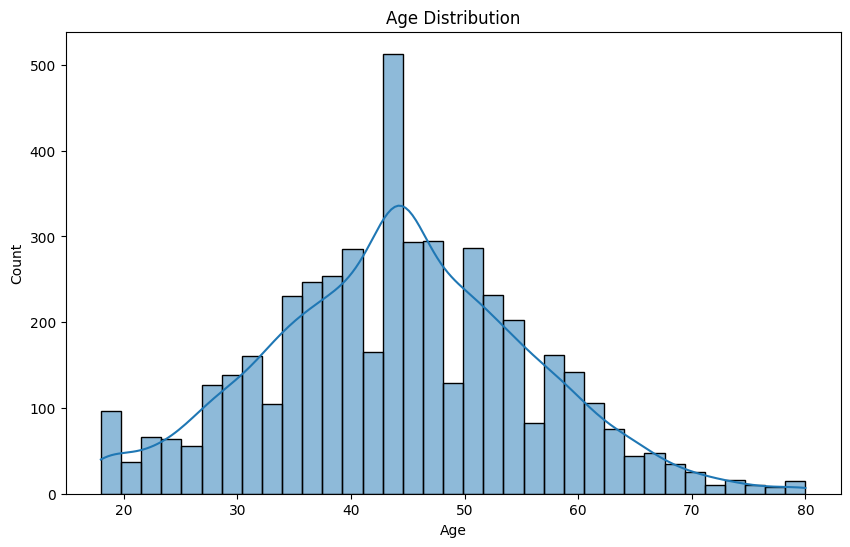

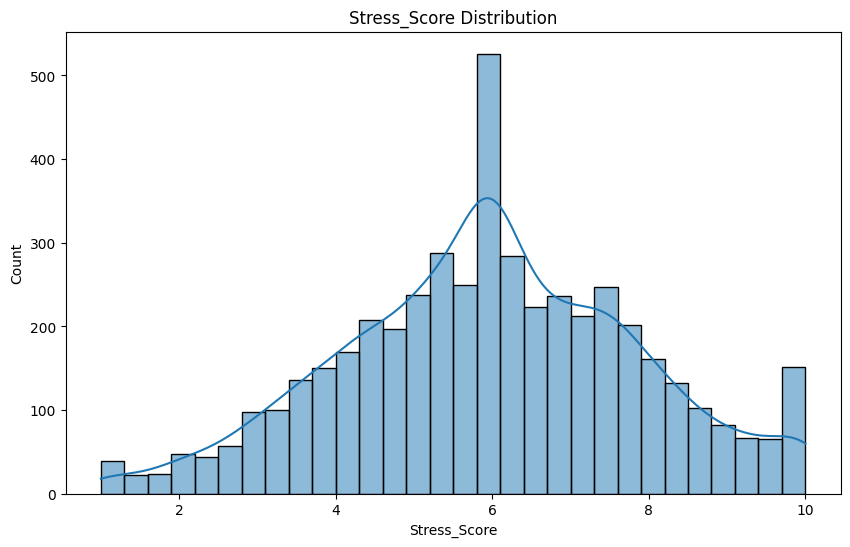

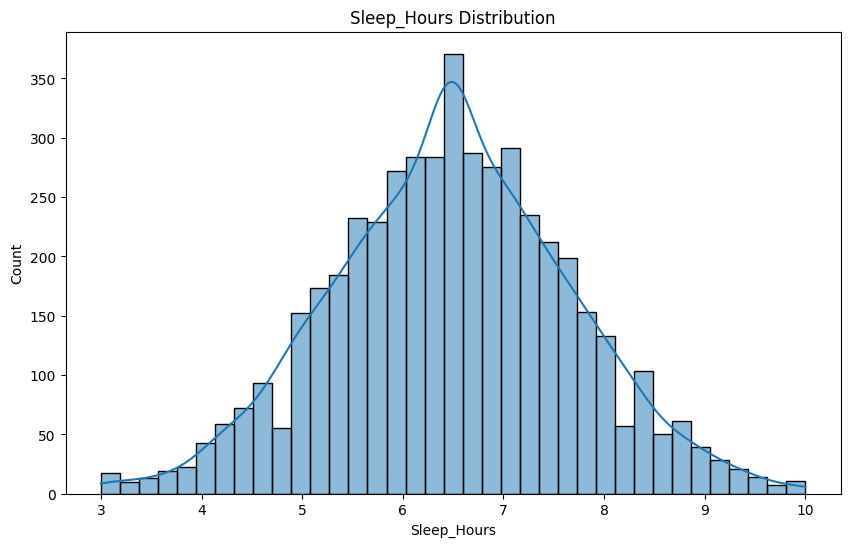

In [12]:
# Breakdown for all the numeric values
for col in numeric:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show

<Axes: >

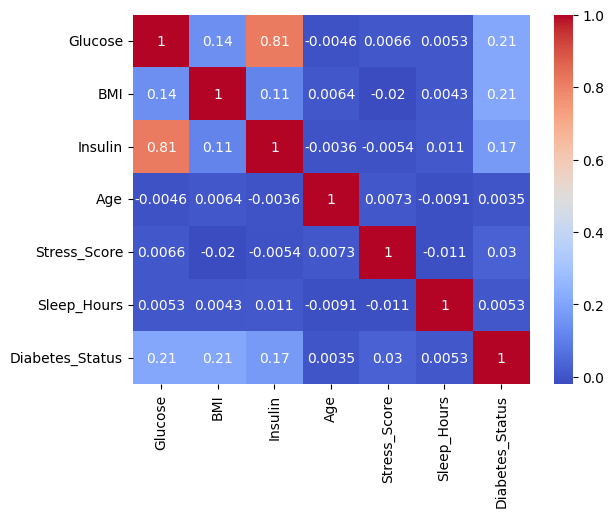

In [13]:
# Heatmap correlation for numeric variables
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

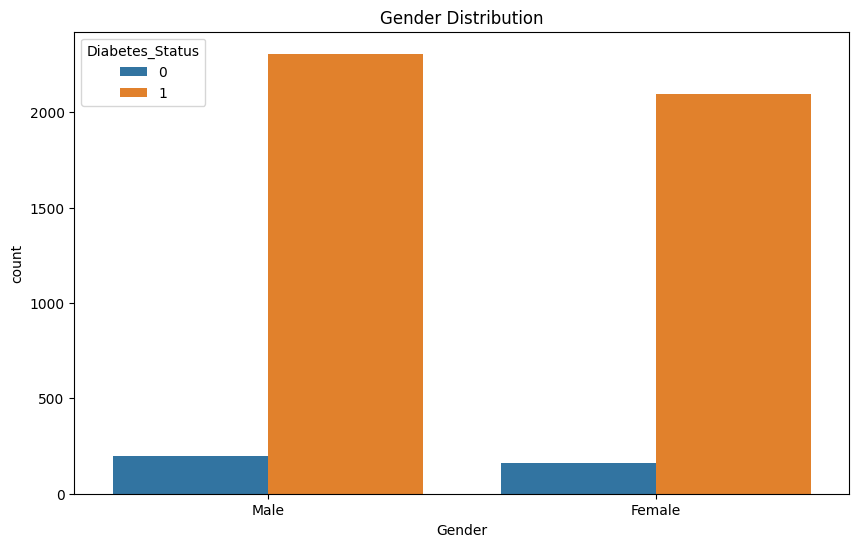

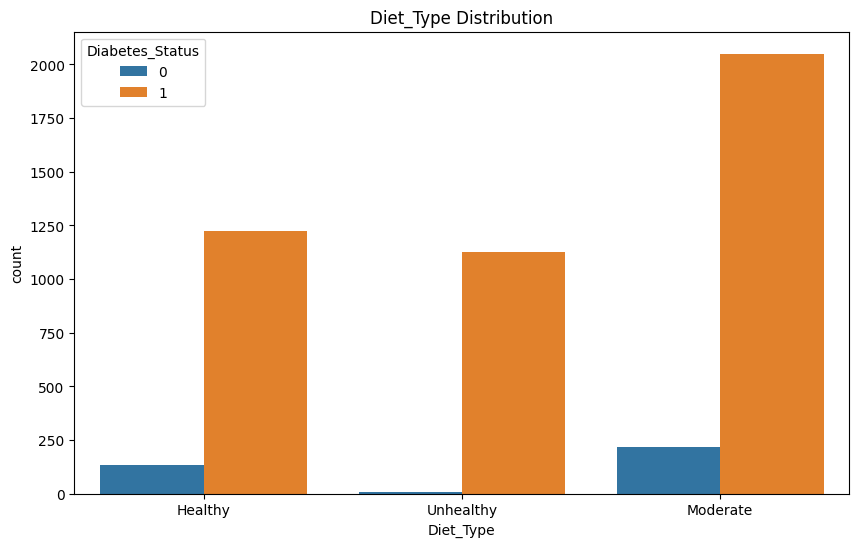

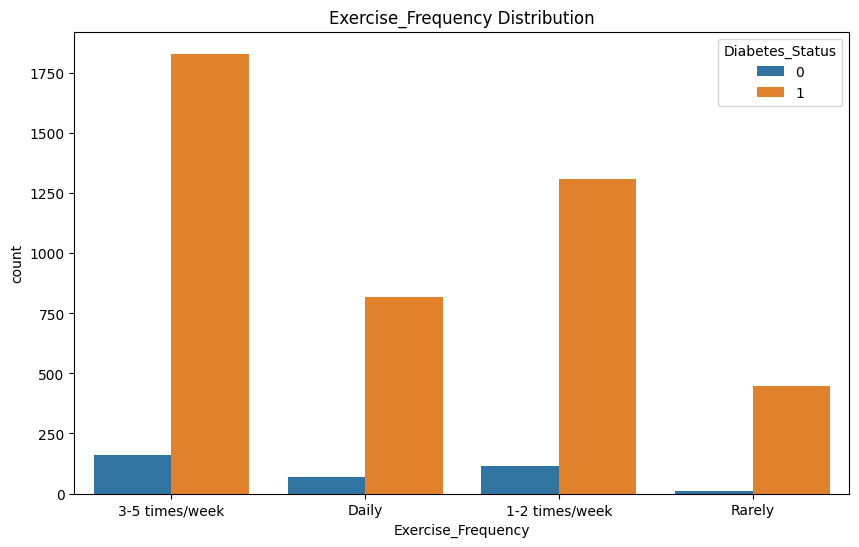

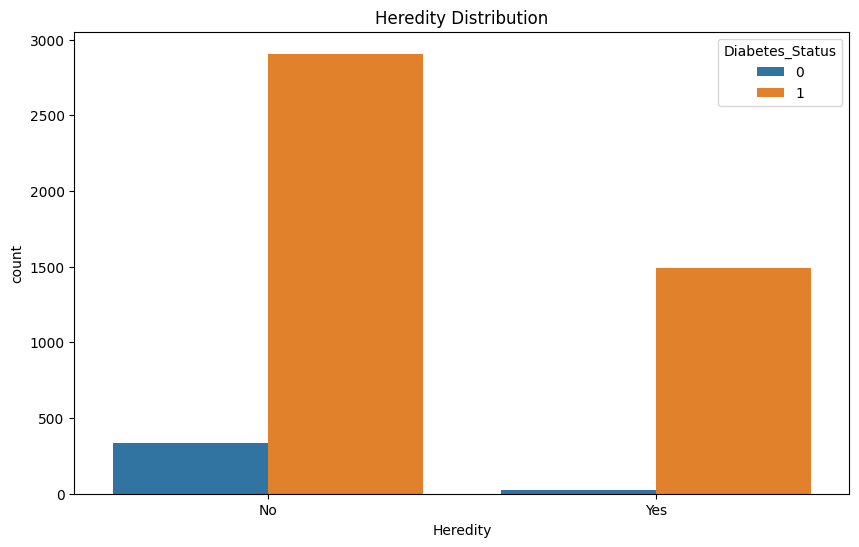

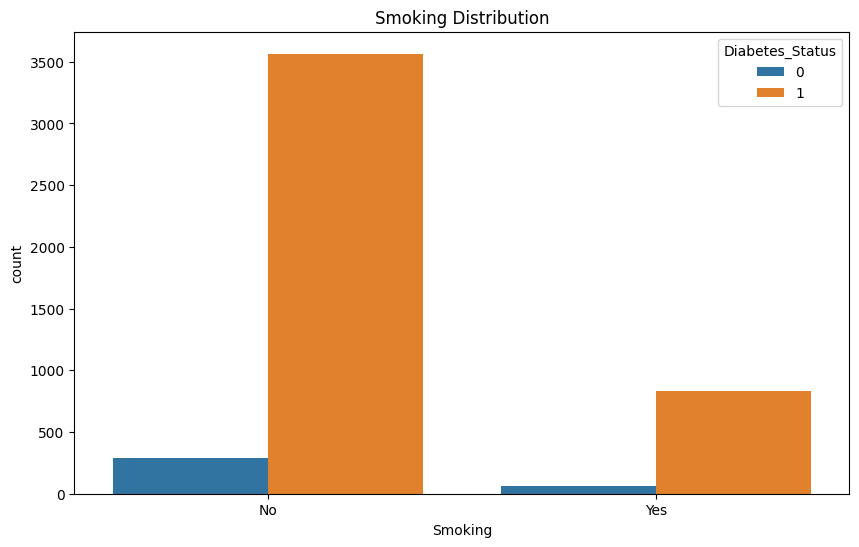

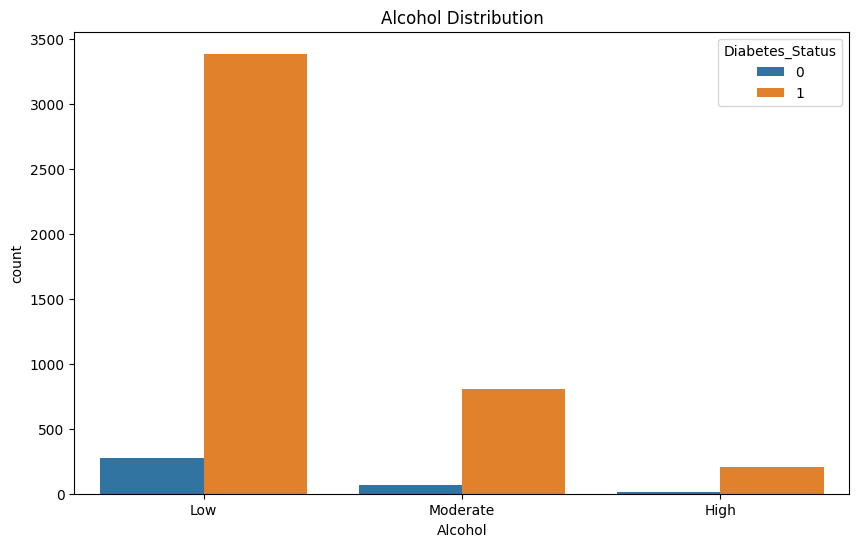

In [14]:
for col in categorical: 
    plt.figure(figsize=(10, 6))
    sns.countplot(df, hue='Diabetes_Status', x=col)
    plt.title(f'{col} Distribution')
    plt.show

In [15]:
df.head()

,Glucose,BMI,Insulin,Age,Gender,Diet_Type,Exercise_Frequency,Heredity,Smoking,Alcohol,Stress_Score,Sleep_Hours,Diabetes_Status
0,101.3,30.900000,83.6,51.0,Male,Healthy,3-5 times/week,No,No,Low,7.5,6.5,1
1,121.8,28.000000,78.7,52.0,Female,Unhealthy,Daily,No,No,Moderate,6.9,6.6,1
2,121.2,27.200000,79.3,51.0,Male,Healthy,3-5 times/week,No,No,Low,5.4,6.8,1
3,121.9,22.800000,93.1,46.0,Male,Moderate,Daily,No,No,Low,4.0,6.3,0
4,156.3,26.621791,77.3,42.0,Male,Unhealthy,1-2 times/week,No,No,Low,6.5,5.6,1


In [16]:
# One Hot Encoder (Gender, Hereditary, Smoking) + Label Encoder (Diet_type, Exercise_Frequency, Alcohol)

le = LabelEncoder()
for col in categorical: 
    df[col] = le.fit_transform(df[col])
    print(f"{col} categories:  {list(le.classes_)}")

Gender categories:  ['Female', 'Male']
Diet_Type categories:  ['Healthy', 'Moderate', 'Unhealthy']
Exercise_Frequency categories:  ['1-2 times/week', '3-5 times/week', 'Daily', 'Rarely']
Heredity categories:  ['No', 'Yes']
Smoking categories:  ['No', 'Yes']
Alcohol categories:  ['High', 'Low', 'Moderate']


In [17]:
df

,Glucose,BMI,Insulin,Age,Gender,Diet_Type,Exercise_Frequency,Heredity,Smoking,Alcohol,Stress_Score,Sleep_Hours,Diabetes_Status
0,101.300000,30.900000,83.6,51.0,1,0,1,0,0,1,7.5,6.5,1
1,121.800000,28.000000,78.7,52.0,0,2,2,0,0,2,6.9,6.6,1
2,121.200000,27.200000,79.3,51.0,1,0,1,0,0,1,5.4,6.8,1
3,121.900000,22.800000,93.1,46.0,1,1,2,0,0,1,4.0,6.3,0
4,156.300000,26.621791,77.3,42.0,1,2,0,0,0,1,6.5,5.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,157.500000,31.700000,91.6,66.0,1,2,1,0,0,1,5.8,7.0,1
4996,122.097558,17.200000,17.4,77.0,0,1,3,0,0,1,5.2,7.3,1
4997,113.400000,26.600000,72.1,46.0,1,1,1,0,1,2,6.3,4.5,1
4998,71.800000,26.900000,45.5,58.0,0,0,3,0,0,1,4.6,6.1,1


In [18]:
X = df.drop(columns=['Diabetes_Status'])
y = df['Diabetes_Status']

# Scales everything 
scaler = MinMaxScaler()
for col in numeric:
    if col == 'Diabetes_Status':
        break
    X[col] = scaler.fit_transform(X[[col]])


In [19]:
X

,Glucose,BMI,Insulin,Age,Gender,Diet_Type,Exercise_Frequency,Heredity,Smoking,Alcohol,Stress_Score,Sleep_Hours
0,0.232022,0.504478,0.485693,0.532258,1,0,1,0,0,1,0.722222,0.500000
1,0.347191,0.417910,0.449743,0.548387,0,2,2,0,0,2,0.655556,0.514286
2,0.343820,0.394030,0.454145,0.532258,1,0,1,0,0,1,0.488889,0.542857
3,0.347753,0.262687,0.555393,0.451613,1,1,2,0,0,1,0.333333,0.471429
4,0.541011,0.376770,0.439472,0.387097,1,2,0,0,0,1,0.611111,0.371429
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.547753,0.528358,0.544387,0.774194,1,2,1,0,0,1,0.533333,0.571429
4996,0.348863,0.095522,0.000000,0.951613,0,1,3,0,0,1,0.466667,0.614286
4997,0.300000,0.376119,0.401321,0.451613,1,1,1,0,1,2,0.588889,0.214286
4998,0.066292,0.385075,0.206163,0.645161,0,0,3,0,0,1,0.400000,0.442857


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(3808, 12)

# Logistic Regression

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.92      1.00      0.96       875

    accuracy                           0.92       952
   macro avg       0.46      0.50      0.48       952
weighted avg       0.84      0.92      0.88       952



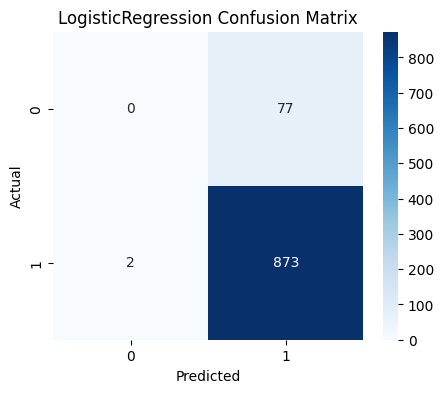

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LogisticRegression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.22      0.21        77
           1       0.93      0.92      0.92       875

    accuracy                           0.86       952
   macro avg       0.56      0.57      0.57       952
weighted avg       0.87      0.86      0.87       952



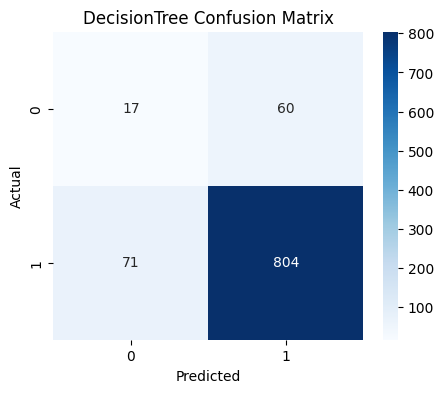

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('DecisionTree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [36]:
model = RandomForestClassifier(n_estimators=150)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.92      1.00      0.96       875

    accuracy                           0.92       952
   macro avg       0.46      0.50      0.48       952
weighted avg       0.84      0.92      0.88       952



c:\Users\AdamHuang\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\AdamHuang\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\AdamHuang\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

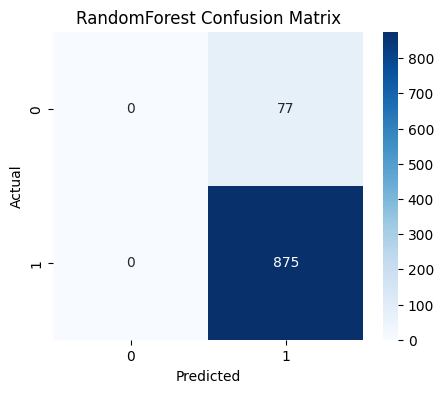

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network

In [38]:
model = MLPClassifier(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.01      0.02        77
           1       0.92      0.99      0.95       875

    accuracy                           0.91       952
   macro avg       0.52      0.50      0.49       952
weighted avg       0.85      0.91      0.88       952



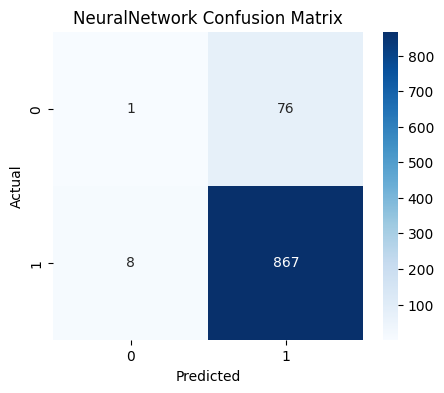

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('NeuralNetwork Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()